# BZAN ML Final

### Importing packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns

### Import train and test datasets

In [3]:
train_path = 'petfinder-adoption-prediction/train/train.csv'
train = pd.read_csv(train_path)

In [4]:
train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


In [5]:
test_path = 'petfinder-adoption-prediction/test/test.csv'
test = pd.read_csv(test_path)

In [6]:
test

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,2,Dopey & Grey,8,266,266,1,2,6,7,1,...,2,1,2,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Dopey Age: 8mths old Male One half of a pair, ...",e2dfc2935,2.0
1,2,Chi Chi,36,285,264,2,1,4,7,2,...,1,2,1,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Please note that Chichi has been neutered, the...",f153b465f,1.0
2,2,Sticky,2,265,0,1,6,7,0,2,...,2,1,1,200,41326,e59c106e9912fa30c898976278c2e834,0,"Sticky, named such because of his tendency to ...",3c90f3f54,4.0
3,1,Dannie & Kass [In Penang],12,307,0,2,2,5,0,2,...,1,1,2,0,41326,e59c106e9912fa30c898976278c2e834,0,Dannie and Kass are mother and daughter. We en...,e02abc8a3,5.0
4,2,Cuddles,12,265,0,1,2,3,7,2,...,1,1,1,0,41326,e59c106e9912fa30c898976278c2e834,0,"Extremely cuddly cat, hence the origin of his ...",09f0df7d1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,1,Hugo,5,307,307,1,1,2,0,2,...,2,1,2,150,41401,18ec8ca4486bc2760de0bd5390cee30c,0,Found on the streets. Treated for mange. They ...,ae57f8d52,5.0
3968,1,Spot,30,307,307,1,1,2,7,2,...,2,1,1,0,41326,d83be5f5e2d04e24d7376e99eafd8708,0,Very good guard dog. Healthy was found in Fron...,83432904d,2.0
3969,2,NaN,5,300,0,3,1,2,4,2,...,2,1,6,0,41401,30aa45fdbe45e39d5614ef583b569073,0,these cat's mother was killed when they was ne...,399013029,1.0
3970,1,Smokey,24,307,0,2,5,7,0,2,...,2,1,1,0,41325,087903c2819a6297519c93d962b488d5,0,"smokey is good family pet. very obedient,so lo...",fd80b8c80,3.0


### Basic Preprocessing

In [7]:
# Check for missing values
train.isnull().sum()

Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64

Data distribution

For Categorical Variables:

In [36]:
cat_vars = ['Type', 'Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'State']

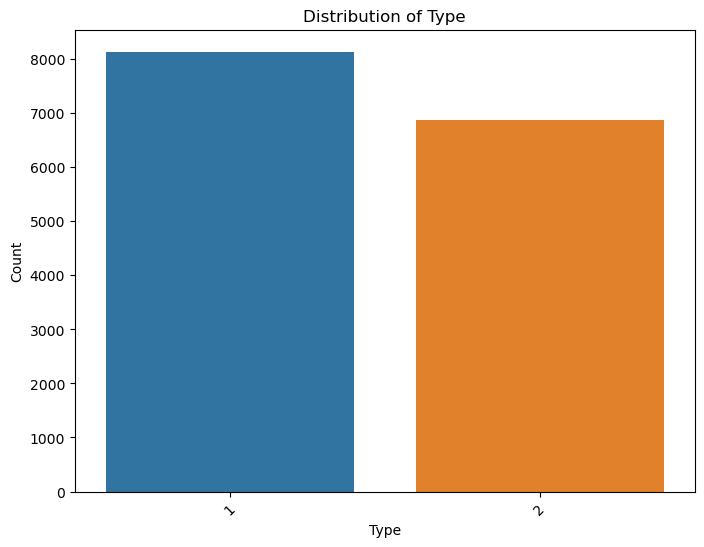

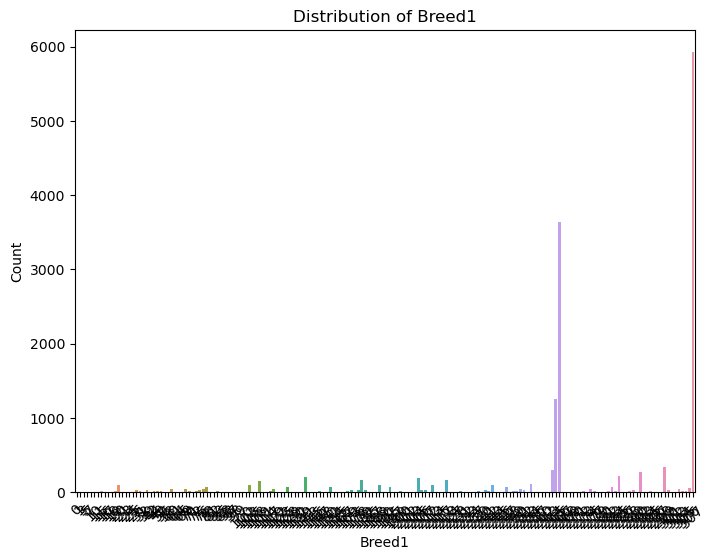

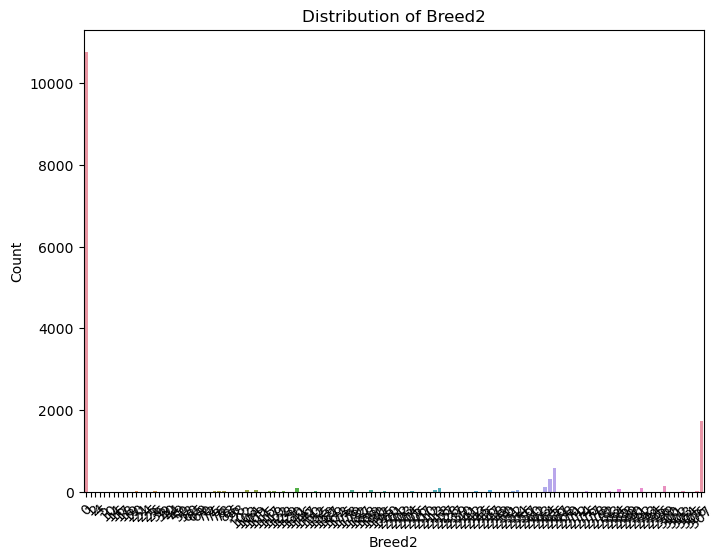

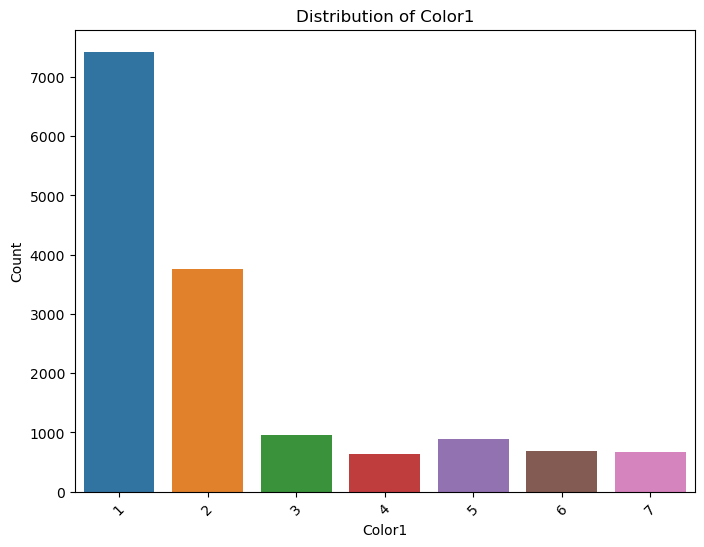

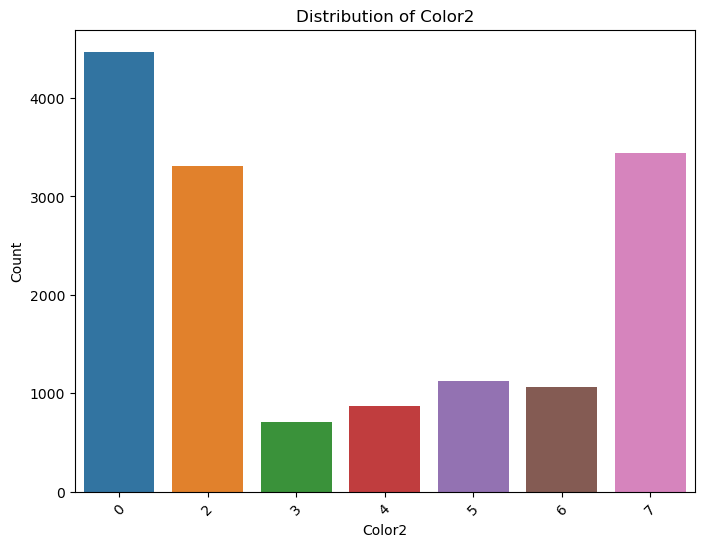

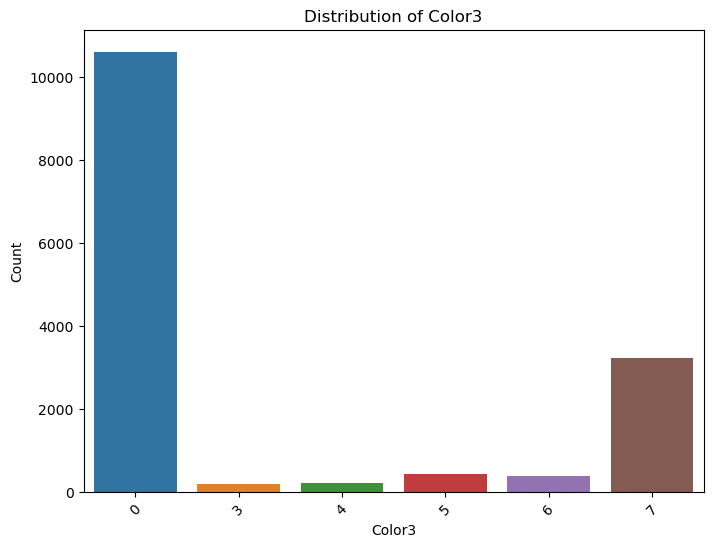

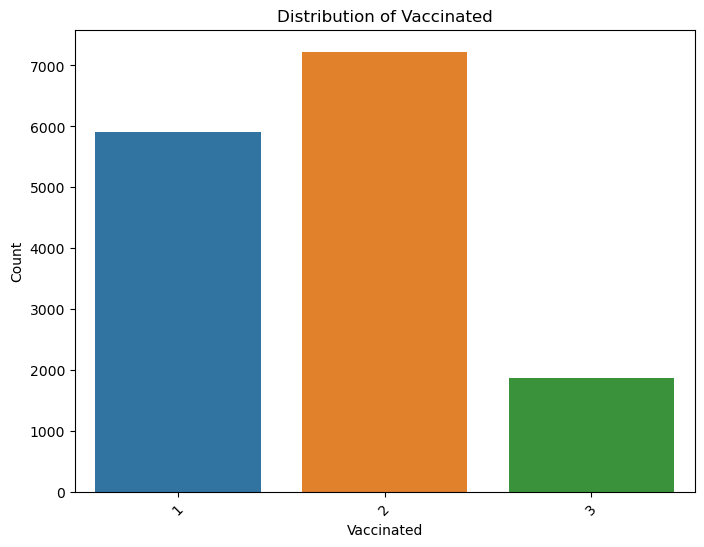

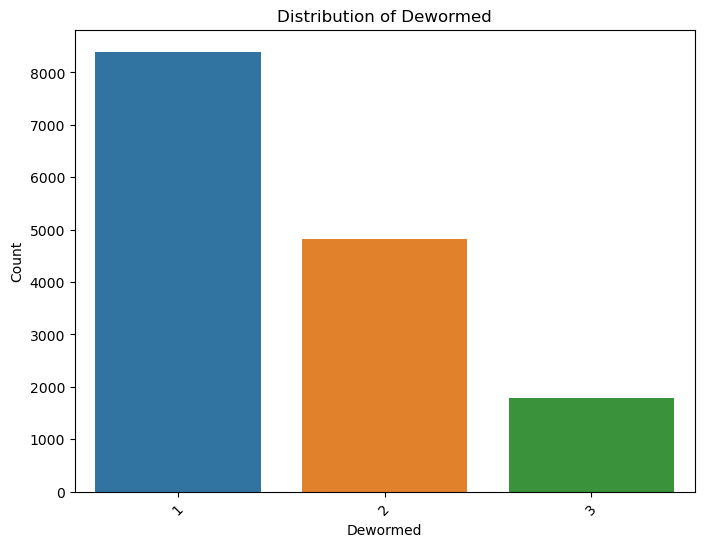

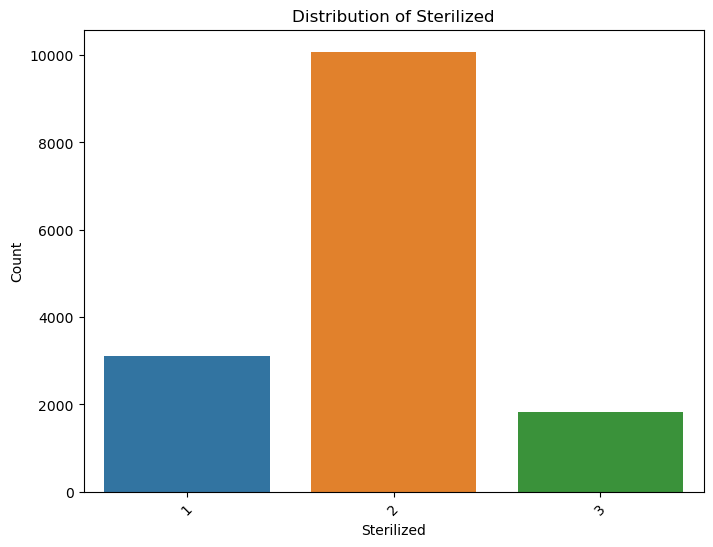

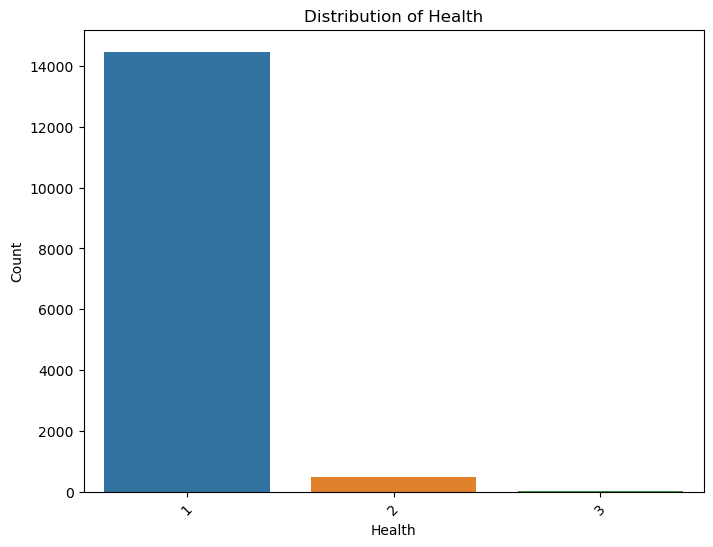

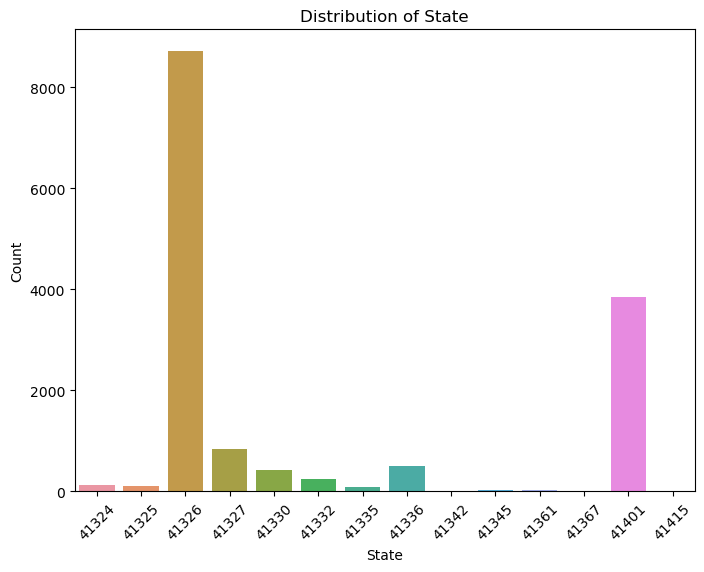

In [38]:
for column in cat_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train, x=column)  # Using Seaborn for countplots
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.show()

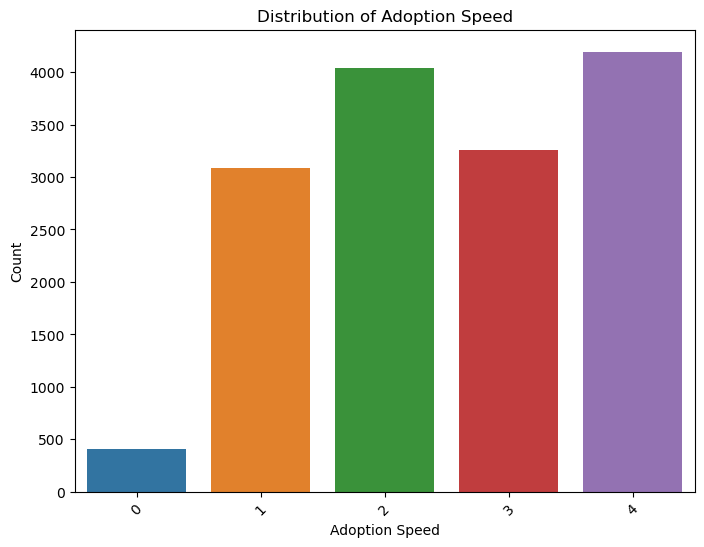

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='AdoptionSpeed')  # Using Seaborn for countplots
plt.title(f'Distribution of Adoption Speed')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

For Numerical Variables:

In [39]:
num_vars = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

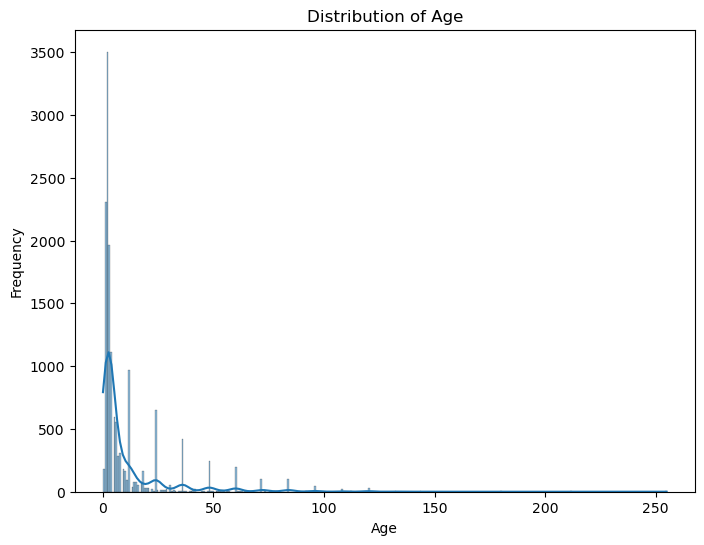

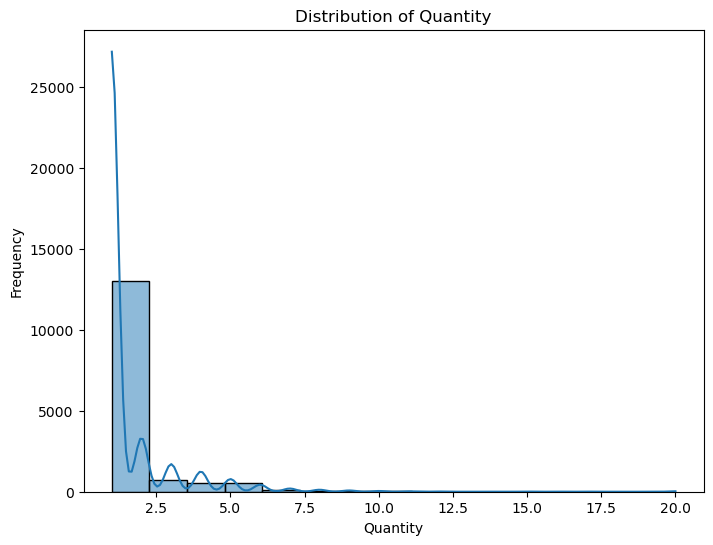

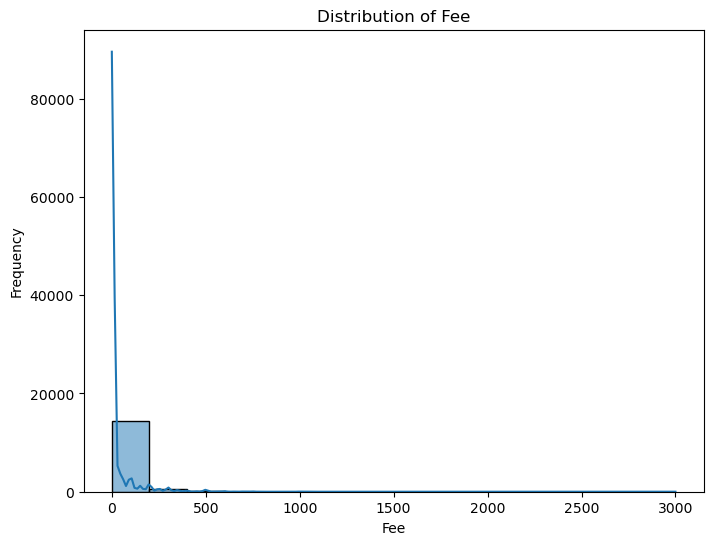

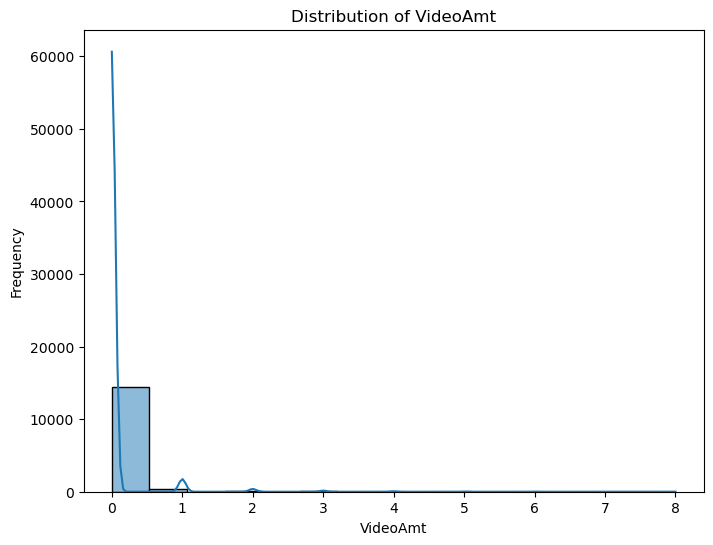

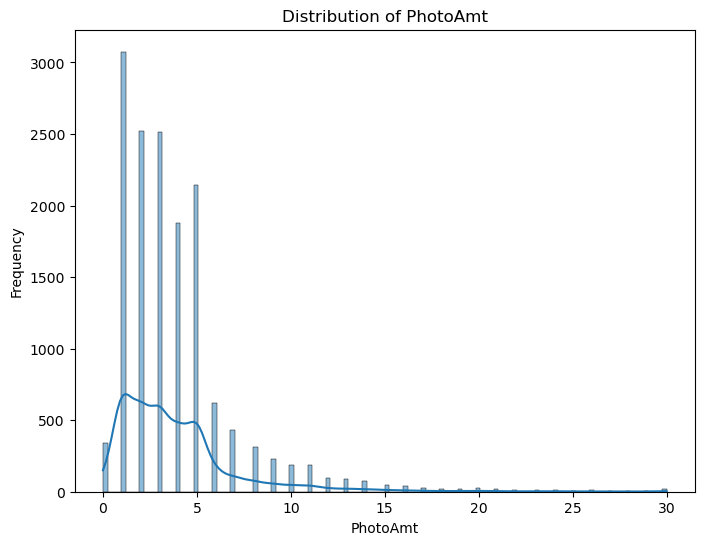

In [40]:
for column in num_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(train[column], kde=True)  # Using Seaborn for histograms
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [35]:
np.unique(train.loc[:,['Color1','Color2', 'Color3']])

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [13]:
len(np.unique(train['RescuerID']))

5595

In [9]:
# Deleting variables Name, PetID and Description. 
# Pet name not informative for prediction. Also, description deleted because we are not doing sentiment analysis
train = train.drop(['Name', 'Description', 'PetID'], axis=1)

# Delete the same columns from the test DataFrame
test = test.drop(['Name', 'Description', 'PetID'], axis=1)

**Missing Value Imputation**


The variables MaturitySize, FurLength, Vaccinated, Dewormed, Sterilized, and Health are all fully represented in the data, however, they do contain values labelled 'Not Sure' or 'Not specified.' Instead of treating these values as missing values and performing imputation for them, I decided to leave them as a separate categorical variable.

**Transforming Categorical Color Variables into Numerical Vectors**

In [25]:
# Create a new DataFrame with counts for each color and target level
counts_df = train.groupby(['Color1', 'AdoptionSpeed']).size().reset_index(name='count')

In [26]:
# Create a new column representing the total count for each color
counts_df['total_count'] = counts_df.groupby('Color1')['count'].transform('sum')


In [27]:
# Create a new column representing the percentage of values for each target level within each color
counts_df['percentage'] = (counts_df['count'] / counts_df['total_count'])

In [29]:
#Convert counts_df into wide data format
# Pivot the counts_df DataFrame to wide format
wide_counts_df = counts_df.pivot(index='Color1', columns='AdoptionSpeed', values='percentage').reset_index()


In [39]:
# Rename the columns for clarity
wide_counts_df = wide_counts_df.rename(columns=lambda col: f'percentage_{col}' if col != 'Color1' and col != 'AdoptionSpeed' else col)


In [40]:
wide_counts_df

AdoptionSpeed,Color1,percentage_0,percentage_1,percentage_2,percentage_3,percentage_4
0,1,0.023293,0.201697,0.274135,0.219873,0.281002
1,2,0.031733,0.183733,0.254933,0.227733,0.301867
2,3,0.030623,0.222809,0.300950,0.194298,0.251320
3,4,0.020505,0.220820,0.228707,0.228707,0.301262
4,5,0.038462,0.248869,0.269231,0.209276,0.234163
5,6,0.042398,0.228070,0.285088,0.194444,0.250000
6,7,0.019490,0.263868,0.272864,0.187406,0.256372


In [41]:
#Merge to train
train_encoded = pd.merge(train, wide_counts_df, how='left', on='Color1')


In [44]:
train_encoded

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,State,RescuerID,VideoAmt,PhotoAmt,AdoptionSpeed,percentage_0,percentage_1,percentage_2,percentage_3,percentage_4
0,2,3,299,0,1,1,7,0,1,1,...,41326,8480853f516546f6cf33aa88cd76c379,0,1.0,2,0.023293,0.201697,0.274135,0.219873,0.281002
1,2,1,265,0,1,1,2,0,2,2,...,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,2.0,0,0.023293,0.201697,0.274135,0.219873,0.281002
2,1,1,307,0,1,2,7,0,2,2,...,41326,fa90fa5b1ee11c86938398b60abc32cb,0,7.0,3,0.031733,0.183733,0.254933,0.227733,0.301867
3,1,4,307,0,2,1,2,0,2,1,...,41401,9238e4f44c71a75282e62f7136c6b240,0,8.0,2,0.023293,0.201697,0.274135,0.219873,0.281002
4,1,1,307,0,1,1,0,0,2,1,...,41326,95481e953f8aed9ec3d16fc4509537e8,0,3.0,2,0.023293,0.201697,0.274135,0.219873,0.281002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,2,266,0,3,1,0,0,2,2,...,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,3.0,2,0.023293,0.201697,0.274135,0.219873,0.281002
14989,2,60,265,264,3,1,4,7,2,2,...,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,3.0,4,0.023293,0.201697,0.274135,0.219873,0.281002
14990,2,2,265,266,3,5,6,7,3,2,...,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,5.0,3,0.038462,0.248869,0.269231,0.209276,0.234163
14991,2,9,266,0,2,4,7,0,1,1,...,41336,c311c0c569245baa147d91fa4e351ae4,0,3.0,4,0.020505,0.220820,0.228707,0.228707,0.301262


We will compare performance of encoding 1 color vs all three (or maybe 2) colors

**Encoding Categorical Variables**

In [30]:
np.unique(train['State'])

array([41324, 41325, 41326, 41327, 41330, 41332, 41335, 41336, 41342,
       41345, 41361, 41367, 41401, 41415], dtype=int64)

For Breed1 and Breed 2, because they have way too many categories, we will only encode the top 7 most frequent variables for Breed 1 and the top 4 variables for Breed2, and the other values will be treated as 1 separate category

In [41]:
top_n = 7
top_categories = train['Breed1'].value_counts().head(top_n).index
train['Breed1'] = train['Breed1'].apply(lambda x: x if x in top_categories else 999)

top_n = 4
top_categories = train['Breed2'].value_counts().head(top_n).index
train['Breed2'] = train['Breed2'].apply(lambda x: x if x in top_categories else 999)

#train = pd.get_dummies(train, columns=['city'])

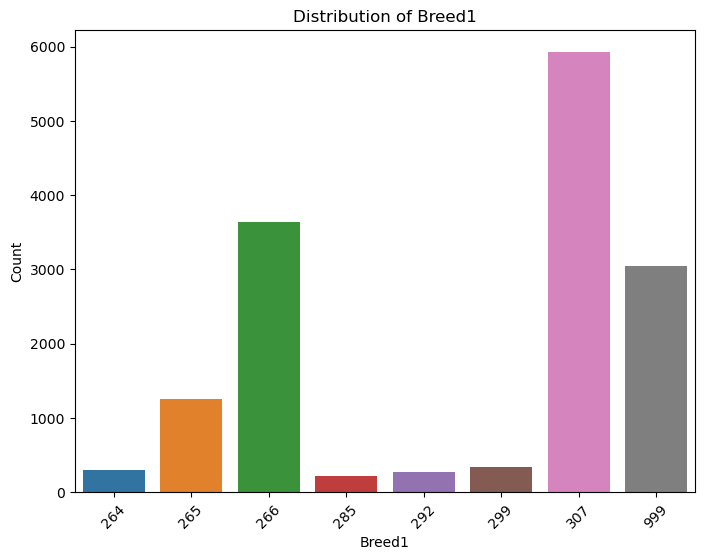

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Breed1')  # Using Seaborn for countplots
plt.title(f'Distribution of Breed1')
plt.xlabel('Breed1')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [55]:
top_n = 7
top_categories = test['Breed1'].value_counts().head(top_n).index
test['Breed1'] = test['Breed1'].apply(lambda x: x if x in top_categories else 999)

top_n = 4
top_categories = test['Breed2'].value_counts().head(top_n).index
test['Breed2'] = test['Breed2'].apply(lambda x: x if x in top_categories else 999)


**Standardizing Numerical Variables**

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[num_vars] = scaler.fit_transform(train[num_vars])


In [56]:
test[num_vars] = scaler.transform(test[num_vars])

Splitting Dataset by type (Cats and Dogs)

In [57]:
cat_train = train.loc[train.loc[:,'Type']==2,:]
dog_train = train.loc[train.loc[:,'Type']==1,:]

In [58]:
cat_test = test.loc[test.loc[:,'Type']==2,:]
dog_test = test.loc[test.loc[:,'Type']==1,:]

In [59]:
#drop 'type' column
cat_train = cat_train.drop(['Type'], axis=1)
dog_train = dog_train.drop(['Type'], axis=1)


In [60]:
cat_test = cat_test.drop(['Type'], axis=1)
dog_test = dog_test.drop(['Type'], axis=1)

In [62]:
cat_train = cat_train.drop(['RescuerID'], axis=1)
cat_test = cat_test.drop(['RescuerID'], axis=1)

dog_train = dog_train.drop(['RescuerID'], axis=1)
dog_test = dog_test.drop(['RescuerID'], axis=1)


In [63]:
cat_test

,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,-0.135062,266,266,1,2,6,7,1,1,1,1,2,1,0.287913,-0.271132,41326,-0.163964,-0.541680
1,1.407197,285,999,2,1,4,7,2,3,1,1,1,2,-0.391237,-0.271132,41326,-0.163964,-0.828403
2,-0.465546,265,0,1,6,7,0,2,2,1,1,2,1,-0.391237,2.279500,41326,-0.163964,0.031765
4,0.085261,265,0,1,2,3,7,2,2,1,1,1,1,-0.391237,-0.271132,41326,-0.163964,0.318487
5,-0.355385,265,0,1,6,7,0,2,2,1,1,2,1,-0.391237,-0.271132,41326,-0.163964,-0.254958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3964,-0.465546,266,0,1,2,3,7,2,1,3,3,3,1,0.967063,-0.271132,41401,-0.163964,-0.828403
3965,0.305583,265,0,1,2,5,6,3,2,1,1,3,1,-0.391237,0.366526,41326,-0.163964,-0.541680
3966,-0.520627,265,0,3,1,7,0,2,2,2,2,2,1,0.967063,-0.271132,41401,2.724765,-0.541680
3969,-0.300304,999,0,3,1,2,4,2,2,2,3,2,1,3.004514,-0.271132,41401,-0.163964,-0.828403


In [65]:
len(cat_train.columns)

19

In [66]:
len(cat_test.columns)

18

Splitting train into X and y

In [67]:
X_cat_train = cat_train.drop('AdoptionSpeed', axis=1)
y_cat_train = cat_train['AdoptionSpeed']

In [68]:
X_dog_train = dog_train.drop('AdoptionSpeed', axis=1)
y_dog_train = dog_train['AdoptionSpeed']

Encoding Categorical Variables

In [69]:
#train = pd.get_dummies(train, columns=['city'])
X_cat_train = pd.get_dummies(X_cat_train, columns=['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Vaccinated', 
                                                   'Dewormed', 'Sterilized', 'Health', 'State'])
X_dog_train = pd.get_dummies(X_dog_train, columns=['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Vaccinated', 
                                                   'Dewormed', 'Sterilized', 'Health', 'State'])

In [72]:
cat_test = pd.get_dummies(cat_test, columns=['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Vaccinated', 
                                                   'Dewormed', 'Sterilized', 'Health', 'State'])
dog_test = pd.get_dummies(dog_test, columns=['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Vaccinated', 
                                                   'Dewormed', 'Sterilized', 'Health', 'State'])

In [70]:
X_dog_train

,Age,Gender,MaturitySize,FurLength,Quantity,Fee,VideoAmt,PhotoAmt,Breed1_307,Breed1_999,...,State_41330,State_41332,State_41335,State_41336,State_41342,State_41345,State_41361,State_41367,State_41401,State_41415
2,-0.520627,1,2,2,-0.391237,-0.271132,-0.163964,0.891932,True,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.355385,2,2,1,-0.391237,1.641842,-0.163964,1.178654,True,False,...,False,False,False,False,False,False,False,False,True,False
4,-0.520627,1,2,1,-0.391237,-0.271132,-0.163964,-0.254958,True,False,...,False,False,False,False,False,False,False,False,False,False
7,-0.575708,2,2,1,3.004514,-0.271132,-0.163964,1.465377,True,False,...,False,False,False,False,False,False,False,False,False,False
10,-0.465546,1,2,1,-0.391237,-0.271132,-0.163964,0.891932,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14983,-0.410466,1,2,2,-0.391237,-0.271132,-0.163964,0.891932,True,False,...,False,False,False,False,False,False,False,False,False,False
14984,2.729133,2,2,2,-0.391237,-0.271132,-0.163964,-0.828403,True,False,...,False,False,False,False,False,False,False,False,False,False
14985,0.746229,1,2,2,-0.391237,-0.271132,-0.163964,-1.115125,False,True,...,False,False,False,False,False,False,False,False,False,False
14987,-0.245223,2,1,3,-0.391237,-0.271132,-0.163964,-0.828403,False,True,...,False,False,False,False,False,False,False,False,True,False


k-NN

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
def knn_with_hyperparameter_testing(X_train, y_train, X_test, y_test, k_values):
    results = {}  # To store results for different k values

    for k in k_values:
        # Create and train a k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = knn.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[k] = accuracy

    return results

Hyperparameter testing for Cat dataset

In [84]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat_train, y_cat_train, test_size=0.2, random_state=42)

accuracies = knn_with_hyperparameter_testing(X_train_cat, y_train_cat, X_test_cat, y_test_cat,[1,2,3,5,7,10,15,20,25,35,50])

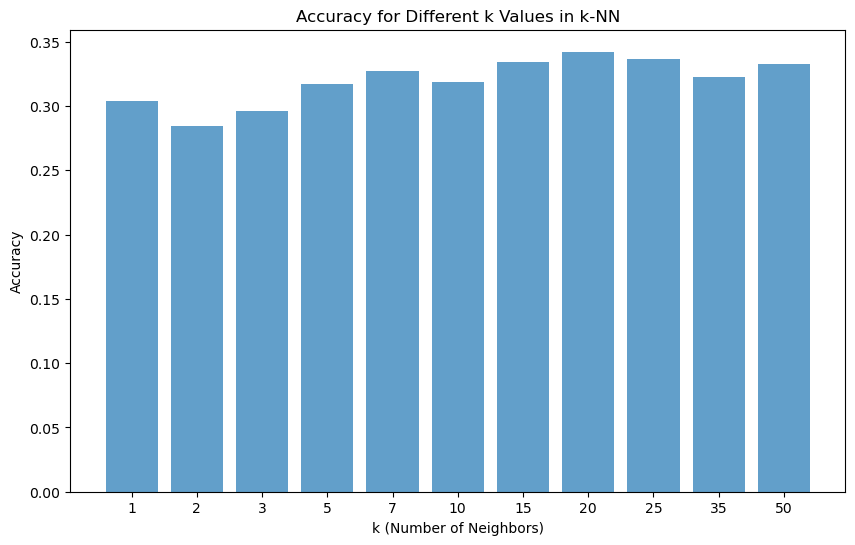

In [85]:
# Extract k values and corresponding accuracies from the results dictionary
k_values = [1,2,3,5,7,10,15,20,25,35,50]
accuracies = list(accuracies.values())

# Create a bar plot with evenly spaced x-ticks
plt.figure(figsize=(10, 6))
plt.bar(range(len(k_values)), accuracies, align='center', alpha=0.7)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k Values in k-NN')

# Set the x-tick labels to be the actual k values
plt.xticks(range(len(k_values)), k_values)
plt.show()


Hyperparameter testing for dog dataset

In [86]:
X_train_dog, X_test_dog, y_train_dog, y_test_dog = train_test_split(X_dog_train, y_dog_train, test_size=0.2, random_state=42)

accuracies = knn_with_hyperparameter_testing(X_train_dog, y_train_dog, X_test_dog, y_test_dog,[1,2,3,5,7,10,15,20,25,35,50])

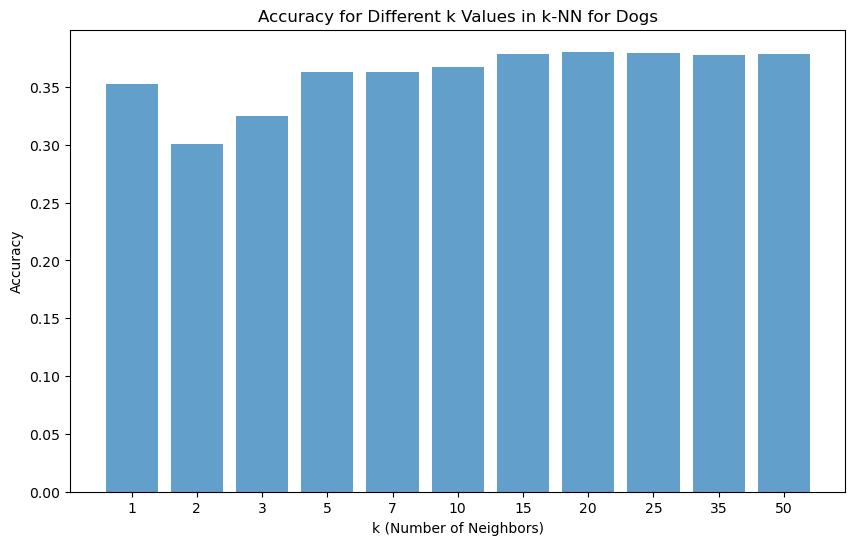

In [87]:
# Extract k values and corresponding accuracies from the results dictionary
k_values = [1,2,3,5,7,10,15,20,25,35,50]
accuracies = list(accuracies.values())

# Create a bar plot with evenly spaced x-ticks
plt.figure(figsize=(10, 6))
plt.bar(range(len(k_values)), accuracies, align='center', alpha=0.7)
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different k Values in k-NN for Dogs')

# Set the x-tick labels to be the actual k values
plt.xticks(range(len(k_values)), k_values)
plt.show()

For both the dog and cat datasets, k=20 produces the most accurate models for predicting adoption time

Random Forests

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
def random_forest_hyperparameter_tuning(X_train, y_train, hyperparameters):
    """
    Train and tune a Random Forest classifier using hyperparameter tuning.

    Parameters:
        X_train (DataFrame or array-like): Training features.
        y_train (Series or array-like): Training target labels.
        hyperparameters (dict): Dictionary of hyperparameters to tune.

    Returns:
        RandomForestClassifier: Best Random Forest model after hyperparameter tuning.
    """
    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier()

    # Create a grid of hyperparameters to search
    param_grid = {
        'n_estimators': hyperparameters.get('n_estimators', [100]),
        'max_depth': hyperparameters.get('max_depth', [None, 10, 20, 30]),
        'min_samples_split': hyperparameters.get('min_samples_split', [2, 5, 10]),
        'min_samples_leaf': hyperparameters.get('min_samples_leaf', [1, 2, 4]),
        #'max_features': hyperparameters.get('max_features', ['auto', 'sqrt', 'log2'])
    }

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_


    # Get the best model from the grid search
    best_rf_model = grid_search.best_estimator_

    return grid_search, best_rf_model, best_params, best_score

Random Forest Hyperparameter tuning for cats

In [102]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2']
}
grid_search, cat_rf_model, cat_params, cat_best_score = random_forest_hyperparameter_tuning(X_cat_train, y_cat_train, param_grid)

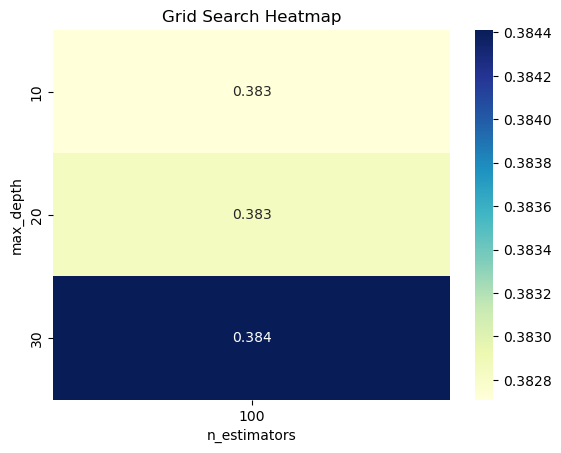

In [103]:
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_table = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Heatmap')
plt.show()

In [104]:
cat_params

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [105]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [30, 40, 50],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [1],
    #'max_features': ['auto', 'sqrt', 'log2']
}
grid_search, cat_rf_model, cat_params, cat_best_score = random_forest_hyperparameter_tuning(X_cat_train, y_cat_train, param_grid)

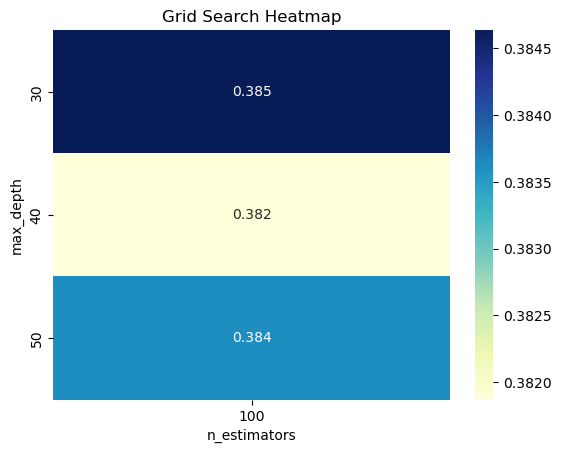

In [106]:
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_table = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Heatmap')
plt.show()

In [107]:
cat_params

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [109]:
cat_best_score

0.38813508755911064

In [108]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2']
}
grid_search, dog_rf_model, dog_params, dog_best_score = random_forest_hyperparameter_tuning(X_dog_train, y_dog_train, param_grid)

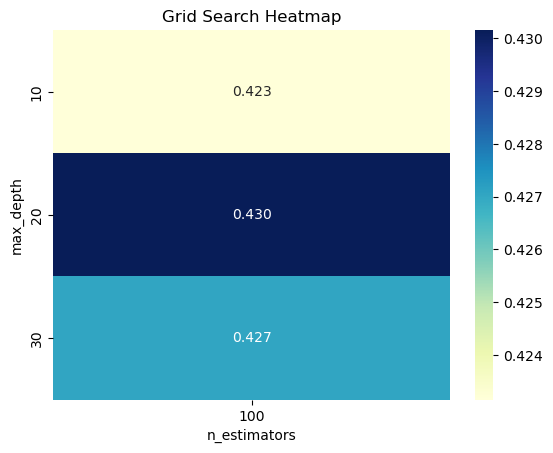

In [110]:
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_table = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Heatmap')
plt.show()

In [111]:
dog_params

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [112]:
dog_best_score

0.43531806061760675

In [113]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [4, 8, 12],
    #'max_features': ['auto', 'sqrt', 'log2']
}
grid_search, dog_rf_model, dog_params, dog_best_score = random_forest_hyperparameter_tuning(X_dog_train, y_dog_train, param_grid)

In [114]:
results_df = pd.DataFrame(grid_search.cv_results_)
pivot_table = results_df.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Grid Search Heatmap')
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [115]:
dog_best_score

0.43310350927725627

In [116]:
dog_params

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 15,
 'n_estimators': 100}